## Importing librarie

In [39]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 

#Importing libraries to connect to the database
import auth
import getpass

user  = getpass.getuser()
token = auth.get_valid_token()

#Connecting to Datalake
import trino
import os
connection = trino.dbapi.connect(
    host=os.environ['PRESTO_HOST'],
    port=443,
    user=user,
    catalog="hive",
    schema="dwh_insider",
    http_scheme='https',
    auth=trino.auth.BasicAuthentication(user, token))

# Loading the data

In [40]:
# Taking the claim information from the datalake
query = """
SELECT
       carrier_tracking_number
      , fccs.sk_shipment_id 
      , claim_shipment_number
      , sk_claim_report_date
      , aviailable_claim_amount_euro
      , carrier_name
      , carrier_name_short
      , carrier_country_code
      , claimtype
      , claimsubtype
      , claim_category
      , dd.ZIP
      , dd.city
      , TS_LAST_COT_EVENT
      , TS_LAST_CRT_EVENT
      , value_segment 
FROM
    dwh_confidential.f_clm_claim_shipments as fccs
LEFT JOIN
          dwh_insider.d_clm_carrier_liability as dccl
          ON dccl.sk_clm_carrier_liability = fccs.sk_clm_carrier_liability
LEFT JOIN
          dwh_insider.d_network_carriers as dnc
          ON dnc.sk_network_carrier = dccl.sk_network_carrier
LEFT JOIN
          dwh_insider.d_sf_carrier_claim_types as dscct
          ON dscct.sk_claim_type = fccs.sk_claim_type
LEFT JOIN
          dwh_insider.d_clm_claim_categories as dccc
          ON dccc.sk_claim_category = fccs.sk_claim_category
LEFT JOIN
          dwh_insider.d_manual_refund_reason as dmrr
          ON dmrr.sk_manual_refund_reason = fccs.sk_manual_refund_reason
LEFT JOIN
          dwh_confidential.D_DESTINATIONS dd
          ON fccs.SK_DESTINATION = dd.SK_DESTINATION
LEFT JOIN 
          dwh_confidential.f_fos_shipment_order_items AS ffsoi
          ON ffsoi.sk_shipment_id =fccs.sk_shipment_id 
          AND ffsoi.sk_shipment_date =fccs.sk_shipment_date 
LEFT JOIN 
          dwh_confidential.f_customer_value_segments AS fcvs 
          ON fcvs.sk_customer = ffsoi.sk_customer 
          AND ffsoi.sk_shipment_date  BETWEEN fcvs.SK_VALID_FROM 
          AND fcvs.SK_VALID_UNTIL
Where
      carrier_country_code in ('AT','CH') 
GROUP BY 
      1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
"""
df = pd.read_sql_query(query, connection)
df.head(10)

/tmp/ipykernel_366/3584888893.py:54: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,carrier_tracking_number,sk_shipment_id,claim_shipment_number,sk_claim_report_date,aviailable_claim_amount_euro,carrier_name,carrier_name_short,carrier_country_code,claimtype,claimsubtype,claim_category,ZIP,city,TS_LAST_COT_EVENT,TS_LAST_CRT_EVENT,value_segment
0,996007791544095232,10698719100,1041040218572144,20220221,232.1700000,SWISS POST,PCH,CH,Delivery,Lost in transit,Lost in transit,1264,Saint-Cergue,2022-02-22 10:27:47.000,None,VIP
1,996008376524048959,13508148282,1041040266439364,20221122,255.1000000,SWISS POST,PCH,CH,Delivery,Receipt denied,Delivered - Original Customer,1630,Bulle,2022-11-23 07:35:12.000,None,A
2,996007791545896147,12669760597,1041020252368405,20220906,486.2500000,SWISS POST,PCH,CH,Delivery,Receipt denied,Delivered - Mailbox,4310,Rheinfelden,2022-09-07 14:06:03.000,None,C
3,06215112902257,10191723277,7741030206800120,20220105,250.8300000,DPD,DPD,AT,Delivery,Receipt denied,Delivered - Original Customer,1030,Wien,2022-01-10 13:38:03.000,None,D
4,996007791546124009,12956592852,1040980216915778,20221005,485.4500000,SWISS POST,PCH,CH,Delivery,Receipt denied,Delivered - Original Customer,2300,La Chaux-De-Fonds,2022-10-06 13:34:03.000,None,B
5,1034986039551630223800,10334808267,1040970180555923,20220118,500.0000000,ÖSTERREICHISCHE POST,PAT,AT,Delivery,Lost in transit,Lost in transit,2380,Perchtoldsdorf,2022-01-20 15:28:49.000,None,D
6,996009745933681301,10049272181,1040990176298502,20211220,520.2000000,SWISS POST,PCH,CH,Delivery,Receipt denied,Delivered - Original Customer,6423,Seewen Sz,2021-12-21 18:21:35.000,None,N
7,996013537310752668,11440247859,1041020231411629,20220510,180.8400000,SWISS POST,PCH,CH,Delivery,Lost in transit,Lost in transit,4665,Oftringen,2022-05-11 13:34:54.000,None,B
8,99.60.131017.14081035,12636973254,1040970213068740,20221108,50.7800000,SWISS POST,PCH,CH,Return,PCH,Missing Return,6010,Kriens,None,None,D
9,996013537312204967,12493186126,1040990210119099,20220816,86.9400000,SWISS POST,PCH,CH,Delivery,Receipt denied,Delivered - Mailbox,4058,Basel,2022-08-18 16:09:05.000,None,Passive C


In [41]:
##Loading the data from the Feige team 
feige_data = pd.read_excel('/home/vralaptisrin/nfs/notebooks/Varshitha_notebooks/Feige_project/Fiege_report_nov.xlsx')

In [42]:
#Loading the data and transforming the information for the declined claims for AT and CH markets
declined_claims= feige_data[["Tracking ID","Carrier","Last activity","Country","Rejection","Category","Status","Date received"]]
declined_claims= declined_claims[declined_claims["Last activity"]=='Declined Claim']
declined_claims= declined_claims[declined_claims["Country"].isin(['AT','CH'])]
declined_claims= declined_claims[declined_claims["Status"]=='closed']
declined_claims['Tracking ID']=declined_claims['Tracking ID'].str.strip()
declined_claims=declined_claims[(declined_claims['Tracking ID']!='keine Sendungsnummer vorhanden')&(declined_claims['Tracking ID']!='keine Sendungsnummer')&(declined_claims['Tracking ID']!='1.04102E+15')]
declined_claims['Tracking ID']=declined_claims['Tracking ID'].str.upper()
declined_claims=declined_claims.drop_duplicates()
declined_claims=declined_claims.dropna(subset=['Rejection'])
declined_claims.head(2)

,Tracking ID,Carrier,Last activity,Country,Rejection,Category,Status,Date received
6,1033856021958050740050,Post AT,Declined Claim,AT,Other,Return clarification,closed,2022-08-22 07:02:18
9,1034670500992110243207,Post AT,Declined Claim,AT,Zalando Mistake,Return clarification,closed,2022-08-22 10:49:18


In [43]:
## merging of the data
df['city'] =df['city'].str.upper()
df2=pd.merge( declined_claims,df,left_on="Tracking ID", right_on="carrier_tracking_number", how='left' )
df2=df2[["carrier_tracking_number","Tracking ID","sk_claim_report_date","Date received","Country","Carrier","aviailable_claim_amount_euro","claimtype","claim_category","Category","Rejection","carrier_name","ZIP","city","TS_LAST_COT_EVENT","value_segment"]]
df2['aviailable_claim_amount_euro'] = df2['aviailable_claim_amount_euro'].astype(float)
df2.head(2)

,carrier_tracking_number,Tracking ID,sk_claim_report_date,Date received,Country,Carrier,aviailable_claim_amount_euro,claimtype,claim_category,Category,Rejection,carrier_name,ZIP,city,TS_LAST_COT_EVENT,value_segment
0,1033856021958050740050,1033856021958050740050,20220819,2022-08-22 07:02:18,AT,Post AT,55.08,Return,Missing Return,Return clarification,Other,ÖSTERREICHISCHE POST,1070,WIEN,None,B
1,NaN,1034670500992110243207,NaN,2022-08-22 10:49:18,AT,Post AT,NaN,NaN,NaN,Return clarification,Zalando Mistake,NaN,NaN,NaN,NaN,NaN


In [44]:
df2.groupby(["Carrier","Rejection"]).sum('available_claim_amount')

aviailable_claim_amount_euro
Carrier     Rejection                                                                       
DHL         Zalando Mistake                                                             0.00
DHL Express No Damage Images                                                          255.41
            Safe place delivery                                                         0.00
            Zalando Mistake                                                             8.33
GLS         Deadline expired                                                          352.32
            No Damage Images                                                          786.90
            Safe place delivery                                                       177.35
            Shipment delivered according to contract. No ob...                        148.25
            Zalando Mistake                                                           294.61
Post AT     Deadline expired                                                         2682.01
            No Damage Images                                                        26086.39
            Other                                                                    5171.22
            Packaging insufficient                                                    574.34
            Safe place delivery                                                      7619.33
            Shipment delivered according to contract. No ob...                       1786.90
            Zalando Mistake                                                         10465.51
Post CH     Deadline expired                                                          171.37
            No Damage Images                                                        60796.22
            Other                                                                   14625.36
            Packaging insufficient                                                    228.97
            Safe place delivery                                                    324663.96
            Shipment delivered according to contract. No ob...                     222497.21
            Zalando Mistake                                                         28465.90

In [45]:

##Understanding the reasoning behind Nan values 
nan_values = df2[df2['carrier_tracking_number'].isna()]
print("Number of nan values ",nan_values.shape[0])
##Loading the file into the CSV File format

filepath = Path('nan.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
nan_values.to_csv(filepath) 
nan_values = df2[df2['carrier_tracking_number'].isna()]
nan_values.head(2)

Number of nan values  151


,carrier_tracking_number,Tracking ID,sk_claim_report_date,Date received,Country,Carrier,aviailable_claim_amount_euro,claimtype,claim_category,Category,Rejection,carrier_name,ZIP,city,TS_LAST_COT_EVENT,value_segment
1,NaN,1034670500992110243207,NaN,2022-08-22 10:49:18,AT,Post AT,NaN,NaN,NaN,Return clarification,Zalando Mistake,NaN,NaN,NaN,NaN,NaN
4,NaN,JJD149990200033211713,NaN,2022-08-26 10:08:01,AT,Post AT,NaN,NaN,NaN,Return clarification,Zalando Mistake,NaN,NaN,NaN,NaN,NaN


In [46]:
print('Shape of the dataframe before cleaning ',df2.shape)
df2=df2.dropna(subset = ['carrier_tracking_number'])
print('Shape of the dataframe after cleaning ',df2.shape)

Shape of the dataframe before cleaning  (4324, 16)
Shape of the dataframe after cleaning  (4173, 16)


# CH Analysis

## CH Analysis-Safe place delivery

In [47]:
#For creating a graph
CH_market_analysis=df2[df2["Country"]=="CH"]
CH_market_analysis=CH_market_analysis[CH_market_analysis["Rejection"]=='Safe place delivery']
#Pivoting the information on a Zip level and transfering the information into a CSV file 
m=CH_market_analysis.groupby(['ZIP'], as_index=True)['Tracking ID'].nunique()
new_CH_market_claims=m.to_frame().reset_index()
new_CH_market_claims_more_than_20=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>20]
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_CH_market_claims_more_than_20.head(10)
##Loading the file into the CSV File format
from pathlib import Path  
filepath = Path('out_CH_safe_place_delivery.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
new_CH_market_claims_more_than_20.to_csv(filepath)
print("Shape of the dataframe",new_CH_market_claims_more_than_20.shape)
new_CH_market_claims_more_than_20.head(2)


Shape of the dataframe (15, 2)


,ZIP,number_of_claims
2,1004,34
5,1007,21


In [48]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
m=CH_market_analysis.groupby(['ZIP'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_CH_market_claims=m.reset_index()

new_CH_market_claims_more_than_20=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>20]
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_CH_market_claims_more_than_20.sort_values(by=['ZIP'], ascending=False)

,ZIP,aviailable_claim_amount_euro,number_of_claims
477,8004,4878.55,34
282,4057,5291.46,42
281,4056,2722.56,24
58,1227,4083.49,25
51,1219,4114.78,28
49,1217,3818.72,24
46,1213,4309.88,34
40,1205,3871.26,27
38,1203,3616.55,31
37,1202,3828.05,25


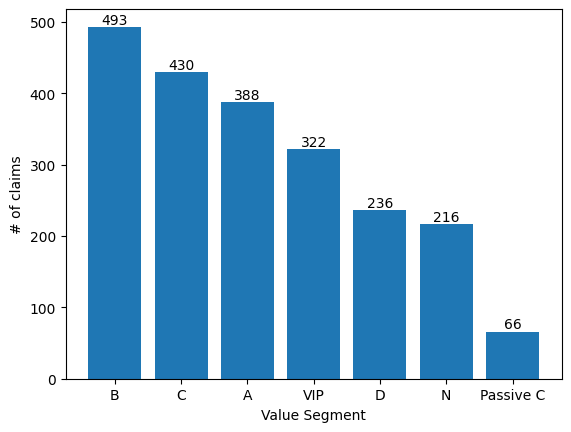

In [49]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
CH_market_analysis=CH_market_analysis[CH_market_analysis["Rejection"]=='Safe place delivery']
CH_market_analysis['aviailable_claim_amount_euro'] = CH_market_analysis['aviailable_claim_amount_euro'].astype(float)
m=CH_market_analysis.groupby(['value_segment'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_CH_market_claims=m.reset_index()
new_CH_market_claims_more_than_20=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>20]
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.sort_values(by=['aviailable_claim_amount_euro'], ascending=False)
x=new_CH_market_claims_more_than_20["value_segment"]
y=new_CH_market_claims_more_than_20["number_of_claims"]
fig, ax = plt.subplots()
x=new_CH_market_claims_more_than_20["value_segment"]
y=new_CH_market_claims_more_than_20["number_of_claims"]
ax.bar(x,y)
# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xlabel("Value Segment")

ax.set_ylabel("# of claims")
plt.show()

## CH Analysis-No damage Images delivery

In [61]:
#For creating a graph
CH_market_analysis=df2[df2["Country"]=="CH"]
CH_market_analysis=CH_market_analysis[CH_market_analysis["Rejection"]=='No Damage Images']
#Pivoting the information on a Zip level and transfering the information into a CSV file 
m=CH_market_analysis.groupby(['ZIP'], as_index=True)['Tracking ID'].nunique()
new_CH_market_claims=m.to_frame().reset_index()
new_CH_market_claims_more_than_2=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>2]
##Loading the file into the CSV File format
from pathlib import Path  
filepath = Path('out_CH_no_damage_images.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
new_CH_market_claims_more_than_2.to_csv(filepath)
new_CH_market_claims_more_than_2.head(2)

,ZIP,Tracking ID
2,1007,3
6,1018,3


In [62]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
m=CH_market_analysis.groupby(['ZIP'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_CH_market_claims=m.reset_index()
new_CH_market_claims_more_than_3=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>3]
new_CH_market_claims_more_than_3=new_CH_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_CH_market_claims_more_than_3.sort_values(by=['ZIP'], ascending=False)

,ZIP,aviailable_claim_amount_euro,number_of_claims
217,8280,847.50,4
181,8004,355.40,4
60,3007,402.58,5
7,1020,647.34,5


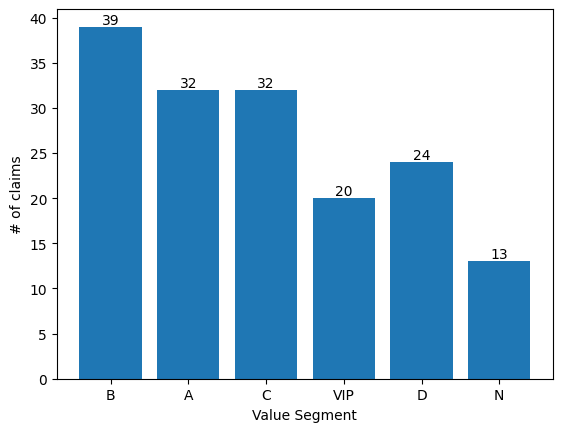

In [66]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
CH_market_analysis['aviailable_claim_amount_euro'] = CH_market_analysis['aviailable_claim_amount_euro'].astype(float)
m=CH_market_analysis.groupby(['value_segment'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_CH_market_claims=m.reset_index()
new_CH_market_claims_more_than_20=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>3]
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.sort_values(by=['aviailable_claim_amount_euro'], ascending=False)
x=new_CH_market_claims_more_than_20["value_segment"]
y=new_CH_market_claims_more_than_20["number_of_claims"]
fig, ax = plt.subplots()
x=new_CH_market_claims_more_than_20["value_segment"]
y=new_CH_market_claims_more_than_20["number_of_claims"]
ax.bar(x,y)
# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(ax.containers[0], label_type='edge')

ax.set_xlabel("Value Segment")
ax.set_ylabel("# of claims")
plt.show()

## CH Analysis- Zalando Mistake

In [64]:
#For creating a graph
CH_market_analysis=df2[df2["Country"]=="CH"]
CH_market_analysis=CH_market_analysis[CH_market_analysis["Rejection"]=='Zalando Mistake']
#Pivoting the information on a Zip level and transfering the information into a CSV file 
m=CH_market_analysis.groupby(['ZIP'], as_index=True)['Tracking ID'].nunique()
new_CH_market_claims=m.to_frame().reset_index()
new_CH_market_claims_more_than_2=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>3]
##Loading the file into the CSV File format
from pathlib import Path  
filepath = Path('out_CH_zalando_mistake.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
new_CH_market_claims_more_than_2.to_csv(filepath)
new_CH_market_claims_more_than_2.head(2)


,ZIP,Tracking ID
3,1018,3
30,1400,3


In [65]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
m=CH_market_analysis.groupby(['ZIP'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_CH_market_claims=m.reset_index()

new_CH_market_claims_more_than_20=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>3]
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_CH_market_claims_more_than_20.sort_values(by=['ZIP'], ascending=False)

,ZIP,aviailable_claim_amount_euro,number_of_claims
115,8600,146.35,3
97,8004,1039.51,3
62,4057,615.74,3
47,3027,431.42,3
44,3007,864.46,3
30,1400,987.82,3
3,1018,729.73,3


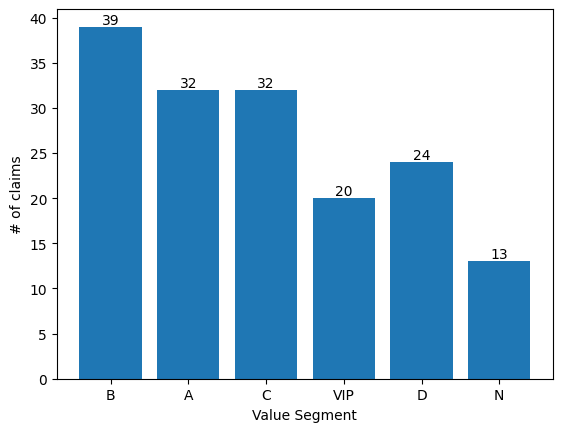

In [16]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
CH_market_analysis['aviailable_claim_amount_euro'] = CH_market_analysis['aviailable_claim_amount_euro'].astype(float)
m=CH_market_analysis.groupby(['value_segment'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_CH_market_claims=m.reset_index()
new_CH_market_claims_more_than_20=new_CH_market_claims[new_CH_market_claims["Tracking ID"]>3]
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_CH_market_claims_more_than_20=new_CH_market_claims_more_than_20.sort_values(by=['aviailable_claim_amount_euro'], ascending=False)
x=new_CH_market_claims_more_than_20["value_segment"]
y=new_CH_market_claims_more_than_20["number_of_claims"]
fig, ax = plt.subplots()
x=new_CH_market_claims_more_than_20["value_segment"]
y=new_CH_market_claims_more_than_20["number_of_claims"]
ax.bar(x,y)
# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xlabel("Value Segment")
ax.set_ylabel("# of claims")
plt.show()

# AT analysis

## AT Analysis-Safe place delivery

In [67]:
#For creating a graph
AT_market_analysis=df2[df2["Country"]=="AT"]
AT_market_analysis=AT_market_analysis[AT_market_analysis["Rejection"]=='Safe place delivery']
#Pivoting the information on a Zip level and transfering the information into a CSV file 
m=AT_market_analysis.groupby(['ZIP'], as_index=True)['Tracking ID'].nunique()
new_AT_market_claims=m.to_frame().reset_index()
new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>5]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20.head(10)
##Loading the file into the CSV File format
from pathlib import Path  
filepath = Path('out_AT_safe_place_delivery.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
new_AT_market_claims_more_than_20.to_csv(filepath)
new_AT_market_claims_more_than_20.head(2)

,ZIP,number_of_claims
5,1100,13
14,1210,7


In [71]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
m=AT_market_analysis.groupby(['ZIP'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_AT_market_claims=m.reset_index()

new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>3]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20.sort_values(by=['ZIP'], ascending=False)

,ZIP,aviailable_claim_amount_euro,number_of_claims
16,1220,238.83,4
14,1210,776.58,7
7,1120,304.75,4
5,1100,1401.48,13
0,1020,304.70,5


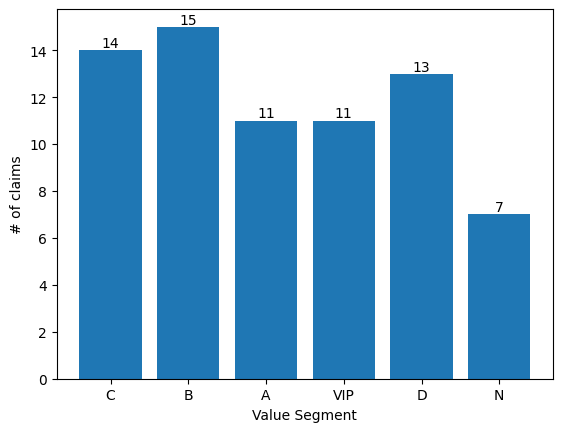

In [76]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
AT_market_analysis=AT_market_analysis[AT_market_analysis["Rejection"]=='Safe place delivery']
AT_market_analysis['aviailable_claim_amount_euro'] = AT_market_analysis['aviailable_claim_amount_euro'].astype(float)
m=AT_market_analysis.groupby(['value_segment'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_AT_market_claims=m.reset_index()
new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>3]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.sort_values(by=['aviailable_claim_amount_euro'], ascending=False)
x=new_AT_market_claims_more_than_20["value_segment"]
y=new_AT_market_claims_more_than_20["number_of_claims"]
fig, ax = plt.subplots()
x=new_AT_market_claims_more_than_20["value_segment"]
y=new_AT_market_claims_more_than_20["number_of_claims"]
ax.bar(x,y)
# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xlabel("Value Segment")
ax.set_ylabel("# of claims")
plt.show()

## AT Analysis-No damage Images delivery

In [20]:
#For creating a graph
AT_market_analysis=df2[df2["Country"]=="AT"]
AT_market_analysis=AT_market_analysis[AT_market_analysis["Rejection"]=='No Damage Images']
#Pivoting the information on a Zip level and transfering the information into a CSV file 
m=AT_market_analysis.groupby(['ZIP'], as_index=True)['Tracking ID'].nunique()
new_AT_market_claims=m.to_frame().reset_index()
new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>5]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20.head(10)
##Loading the file into the CSV File format
from pathlib import Path  
filepath = Path('out_AT_No_Damage_Images.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
new_AT_market_claims_more_than_20.to_csv(filepath)
new_AT_market_claims_more_than_20.head(2)

,ZIP,number_of_claims
7,1100,13
8,1110,7


In [21]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
m=AT_market_analysis.groupby(['ZIP'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_AT_market_claims=m.reset_index()
new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>2]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20.sort_values(by=['ZIP'], ascending=False)

,ZIP,aviailable_claim_amount_euro,number_of_claims
146,8020,363.18,3
145,8010,158.64,3
107,6020,114.79,4
92,5280,148.35,3
85,5020,505.21,3
83,4950,81.61,3
82,4943,121.59,3
56,4052,234.05,3
55,4050,52.45,3
35,2700,161.75,4


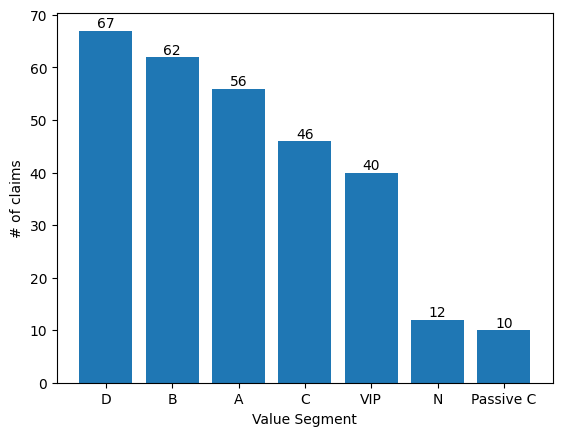

In [22]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
AT_market_analysis=AT_market_analysis[AT_market_analysis["Rejection"]=='No Damage Images']
AT_market_analysis['aviailable_claim_amount_euro'] = AT_market_analysis['aviailable_claim_amount_euro'].astype(float)
m=AT_market_analysis.groupby(['value_segment'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_AT_market_claims=m.reset_index()
new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>2]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.sort_values(by=['aviailable_claim_amount_euro'], ascending=False)
x=new_AT_market_claims_more_than_20["value_segment"]
y=new_AT_market_claims_more_than_20["number_of_claims"]
fig, ax = plt.subplots()
x=new_AT_market_claims_more_than_20["value_segment"]
y=new_AT_market_claims_more_than_20["number_of_claims"]
ax.bar(x,y)
# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xlabel("Value Segment")
ax.set_ylabel("# of claims")
plt.show()

## AT Analysis-Zalando Mistake

In [23]:
#For creating a graph
AT_market_analysis=df2[df2["Country"]=="AT"]
AT_market_analysis=AT_market_analysis[AT_market_analysis["Rejection"]=='Zalando Mistake']
#Pivoting the information on a Zip level and transfering the information into a CSV file 
m=AT_market_analysis.groupby(['ZIP'], as_index=True)['Tracking ID'].nunique()
new_AT_market_claims=m.to_frame().reset_index()
new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>5]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20.head(10)
##Loading the file into the CSV File format
from pathlib import Path  
filepath = Path('out_AT_Zalando_Mistake.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
new_AT_market_claims_more_than_20.to_csv(filepath)
new_AT_market_claims_more_than_20.head(2)

,ZIP,number_of_claims


In [24]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
m=AT_market_analysis.groupby(['ZIP'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_AT_market_claims=m.reset_index()

new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>2]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20.sort_values(by=['ZIP'], ascending=False)

,ZIP,aviailable_claim_amount_euro,number_of_claims
58,8020,291.17,3
12,1190,321.44,5
6,1110,639.19,3


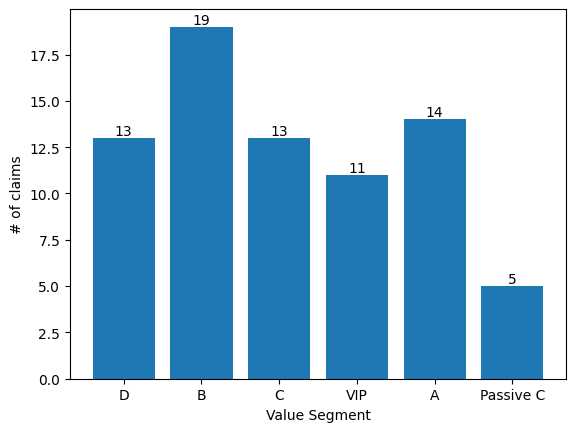

In [25]:
# Creating a overview of the which is that area in which is currently affected highest claims on the safe place delivery
AT_market_analysis=AT_market_analysis[AT_market_analysis["Rejection"]=='Zalando Mistake']
AT_market_analysis['aviailable_claim_amount_euro'] = AT_market_analysis['aviailable_claim_amount_euro'].astype(float)
m=AT_market_analysis.groupby(['value_segment'], as_index=True).agg({'aviailable_claim_amount_euro':'sum','Tracking ID':'nunique'})
new_AT_market_claims=m.reset_index()
new_AT_market_claims_more_than_20=new_AT_market_claims[new_AT_market_claims["Tracking ID"]>2]
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.rename(columns={'Tracking ID':'number_of_claims'})
new_AT_market_claims_more_than_20=new_AT_market_claims_more_than_20.sort_values(by=['aviailable_claim_amount_euro'], ascending=False)
x=new_AT_market_claims_more_than_20["value_segment"]
y=new_AT_market_claims_more_than_20["number_of_claims"]
fig, ax = plt.subplots()
x=new_AT_market_claims_more_than_20["value_segment"]
y=new_AT_market_claims_more_than_20["number_of_claims"]
ax.bar(x,y)
# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xlabel("Value Segment")
ax.set_ylabel("# of claims")
plt.show()